# Task 2

### Imports

In [2]:
from qiskit import *
from qiskit.aqua.components.optimizers.adam_amsgrad import ADAM
from qiskit.aqua.components.optimizers import AQGD
from qiskit.visualization import plot_histogram, plot_state_qsphere as plot_q
from qiskit.providers.aer.noise import NoiseModel

import matplotlib.pyplot as plt
%matplotlib inline
from math import pi

import numpy as np
np.random.seed(7)

### Define Circuits and other Functions 

Here, we'll declare a class including necessary functions. These functions will be used for noisy and noiseless circuit calculation.

We use **Ry** and **Rx** gate on qubit **0** and **Rx** gate on qubit 1. Again, a **CNOT** gate is used, which uses qubit 0 as the control bit. Our main goal here is to implement some sort of **Hadamard** gate on qubit 0 and **Cx** gate on qubit 1, which creates a bell circuit and returns both states `01` and `10` with equal probability. 

In [3]:
class Circuit_Class:
    shots = 1
    
    def get_circuit(self, params):
        q = QuantumCircuit(2, 2)
        q.ry(params[0], 0)
        q.rx(params[1], 0)
        q.rx(params[2], 1)
        q.cnot(0, 1)
        q.measure(0, 0)
        q.measure(1, 1)

        return q


    def get_circuit_outputs(self, params):
        circ = self.get_circuit(params)

        backend = Aer.get_backend('qasm_simulator')
        job = execute(circ, backend, shots=self.shots)
        result = job.result()
        counts = result.get_counts()

        return counts


    def get_cost(self, params):
        counts = self.get_circuit_outputs(params)

        p_00 = (counts["00"] / self.shots * 100) if "00" in counts else 0
        p_01 = (counts["01"] / self.shots * 100) if "01" in counts else 0    
        p_10 = (counts["10"] / self.shots * 100) if "10" in counts else 0
        p_11 = (counts["11"] / self.shots * 100) if "11" in counts else 0

        return (0-p_00)**2 + (50-p_01)**2 + (50-p_10)**2 + (0-p_11)**2
    
    
    def get_circuit_outputs_with_noise(self, params):
        circ = self.get_circuit(params)

        backend = Aer.get_backend('qasm_simulator')
        noise_model = NoiseModel()
        job = execute(circ, backend, shots=self.shots, noise_model=noise_model)
        result = job.result()
        counts = result.get_counts()

        return counts


    def get_cost_with_noise(self, params):
        counts = self.get_circuit_outputs_with_noise(params)

        p_00 = (counts["00"] / self.shots * 100) if "00" in counts else 0
        p_01 = (counts["01"] / self.shots * 100) if "01" in counts else 0    
        p_10 = (counts["10"] / self.shots * 100) if "10" in counts else 0
        p_11 = (counts["11"] / self.shots * 100) if "11" in counts else 0

        return (0-p_00)**2 + (50-p_01)**2 + (50-p_10)**2 + (0-p_11)**2

### Using ADAM Optimizer (Noiseless)

Here we used ADAM Optimizer to optimize the theta values for **Rx** and **Ry** gates.

In [4]:
opt = ADAM(maxiter=5000, tol=0.01, lr=0.1, beta_1=0.9, beta_2=0.999)
steps = 50

points_costs_adam_optimizer = []
obj = Circuit_Class()

for shots in [1, 10, 100, 1000]:
    obj.shots = shots
    print('For shots: ', shots)
    temporary_points = []
    
    for i in range(steps):
        initial_point = np.random.rand(3)
        params = opt.optimize(num_vars=3, objective_function=obj.get_cost, initial_point=initial_point)
        temporary_points.append(params)
        if params[1] <= 1.00:
            break
            
    mini_cost = 500000.00
    mini_point = None
    
    for points in temporary_points:
        if points[1] < mini_cost:
            mini_point = list(points[0])
            mini_cost = points[1]
            
    points_costs_adam_optimizer.append(mini_point)

For shots:  1
For shots:  10
For shots:  100
For shots:  1000


In [5]:
points_costs_adam_optimizer

[[0.9091283748867313, 0.13316944575925016, 0.5234125806737658],
 [1.498688920556474, 1.8837156325228395, 2.315707470316683],
 [1.912210167329676, 1.8466548108554872, 2.1388410165733145],
 [1.0733794301515225, 1.0353849709278589, 3.1098893043397378]]

### Show Results for ADAM Optimizer (Noiseless)

#### Shot 1

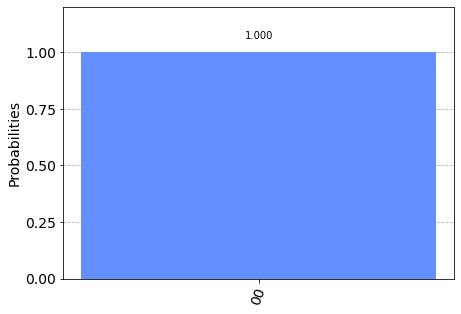

In [6]:
obj = Circuit_Class()
obj.shots = 1
counts = obj.get_circuit_outputs(points_costs_adam_optimizer[0])

plot_histogram(counts)

#### Shots 10

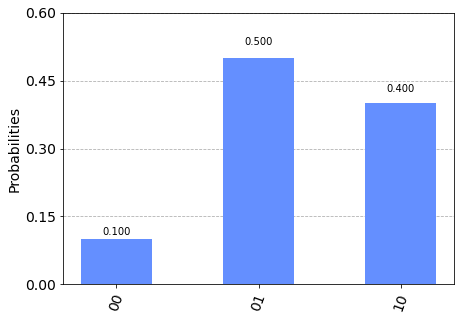

In [7]:
obj.shots = 10
counts = obj.get_circuit_outputs(points_costs_adam_optimizer[1])
plot_histogram(counts)

#### Shots 100

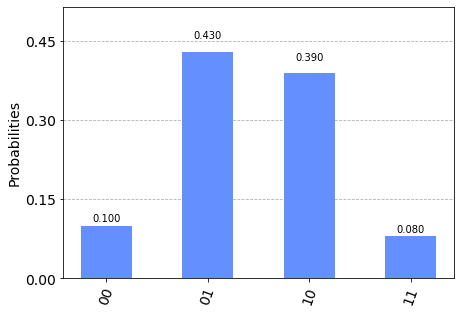

In [8]:
obj.shots = 100
counts = obj.get_circuit_outputs(points_costs_adam_optimizer[2])
plot_histogram(counts)

#### Shots 1000

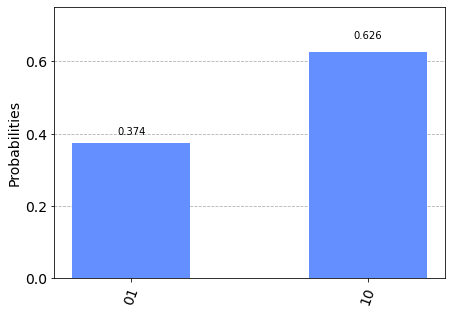

In [9]:
obj.shots = 1000
counts = obj.get_circuit_outputs(points_costs_adam_optimizer[3])
plot_histogram(counts)

### Using ADAM Optimizer (Noise)

In [10]:
opt = ADAM(maxiter=5000, tol=0.01, lr=0.1, beta_1=0.9, beta_2=0.999)
steps = 50

points_costs_adam_optimizer = []
obj = Circuit_Class()

for shots in [1, 10, 100, 1000]:
    obj.shots = shots
    print('For shots: ', shots)
    temporary_points = []
    
    for i in range(steps):
        initial_point = np.random.rand(3)
        params = opt.optimize(num_vars=3, objective_function=obj.get_cost_with_noise, initial_point=initial_point)
        temporary_points.append(params)
        if params[1] <= 1.00:
            break
            
    mini_cost = 500000.00
    mini_point = None
    
    for points in temporary_points:
        if points[1] < mini_cost:
            mini_point = list(points[0])
            mini_cost = points[1]
            
    points_costs_adam_optimizer.append(mini_point)

For shots:  1
For shots:  10
For shots:  100
For shots:  1000


In [11]:
points_costs_adam_optimizer

[[-0.2039000641130584, 0.7524584684437214, 1.7486336506913596],
 [0.0201750623543962, 1.7157489000649675, 2.374394119679149],
 [0.9026073474650889, 1.0400840946358405, 2.0687912907217165],
 [1.4409770118479697, 1.047197643340446, 2.217759032590703]]

### Show Results for ADAM Optimizer (Noise)

#### Shot 1

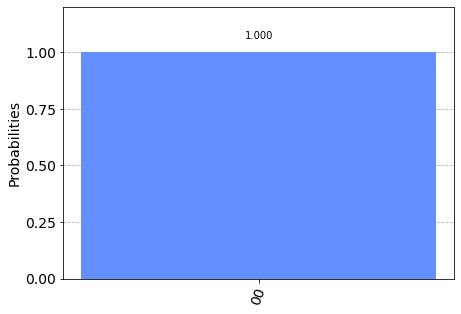

In [12]:
obj = Circuit_Class()
obj.shots = 1
counts = obj.get_circuit_outputs_with_noise(points_costs_adam_optimizer[0])

plot_histogram(counts)

#### Shots 10

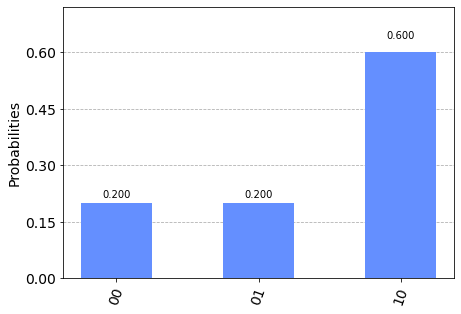

In [13]:
obj.shots = 10
counts = obj.get_circuit_outputs_with_noise(points_costs_adam_optimizer[1])
plot_histogram(counts)

#### Shots 100

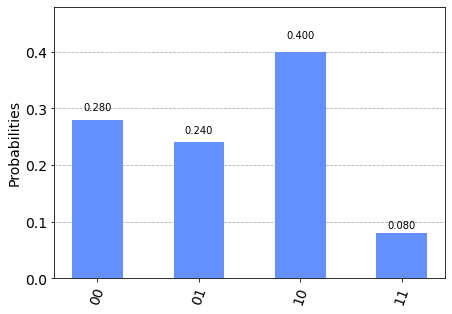

In [14]:
obj.shots = 100
counts = obj.get_circuit_outputs_with_noise(points_costs_adam_optimizer[2])
plot_histogram(counts)

#### Shots 1000

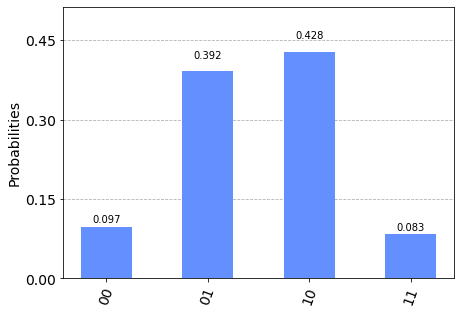

In [15]:
obj.shots = 1000
counts = obj.get_circuit_outputs_with_noise(points_costs_adam_optimizer[3])
plot_histogram(counts)

### Using Gradient Descent (Noiseless)

In [16]:
opt = AQGD(maxiter=500, eta=0.001, tol=0.01, disp=False, momentum=0.0)
steps = 10

points_costs_gd_optimizer = []
obj = Circuit_Class()

for shots in [1, 10, 100, 1000]:
    obj.shots = shots
    print('Running for shots: ', shots)
    temporary_points = []
    initial_point = np.random.rand(3)
    
    for i in range(steps):
        params = opt.optimize(num_vars=3, objective_function=obj.get_cost, initial_point=initial_point)
        temporary_points.append(params)
        print(params)
        initial_point = list(params[0])
        if params[1] <= 1.00:
            break
    
    mini_cost = 500000.00
    mini_point = None
    
    for points in temporary_points:
        if points[1] < mini_cost:
            mini_point = list(points[0])
            mini_cost = points[1]
            
    points_costs_gd_optimizer.append(mini_point)

Running for shots:  1
(array([ 0.67816576, -9.23242052,  5.3801054 ]), 15000.0, 2)
(array([ 0.67816576, -9.23242052,  5.3801054 ]), 15000.0, 0)
(array([ 0.67816576, -9.23242052,  5.3801054 ]), 15000.0, 0)
(array([ 0.67816576, -9.23242052,  5.3801054 ]), 15000.0, 0)
(array([ 0.67816576, -9.23242052,  5.3801054 ]), 15000.0, 0)
(array([ 0.67816576, -9.23242052,  5.3801054 ]), 15000.0, 0)
(array([ 0.67816576, -9.23242052,  5.3801054 ]), 15000.0, 0)
(array([ 0.67816576, -9.23242052,  5.3801054 ]), 15000.0, 0)
(array([ 0.67816576, -9.23242052,  5.3801054 ]), 15000.0, 0)
(array([ 0.67816576, -9.23242052,  5.3801054 ]), 15000.0, 0)
Running for shots:  10
(array([-10.14228815,  -8.11720574,  12.86781991]), 0.0, 500)
Running for shots:  100
(array([  0.34384824,  -5.38947915, 169.20674739]), 2.0, 500)
(array([  3.82884824, -12.89947915,  65.01074739]), 8.0, 500)
(array([ -2.99515176, -11.88947915, 211.50074739]), 0.0, 500)
Running for shots:  1000
(array([ -0.80605196,  -3.21580071, 195.82537938

In [17]:
points_costs_gd_optimizer

[[0.6781657600983213, -9.232420524249342, 5.380105404882535],
 [-10.142288152382227, -8.117205735129328, 12.867819905217221],
 [-2.9951517646663945, -11.889479151930791, 211.50074738928393],
 [-3.518061960373874, -7.534850710427538, 237.94476937654744]]

### Show Results for Gradient Descent (Noiseless)

#### Shots 1

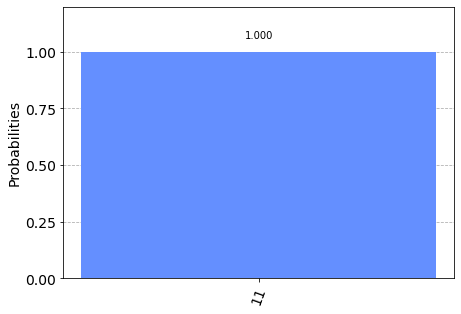

In [18]:
obj = Circuit_Class()
obj.shots = 1
counts = obj.get_circuit_outputs(points_costs_gd_optimizer[0])

plot_histogram(counts)

#### Shots 10

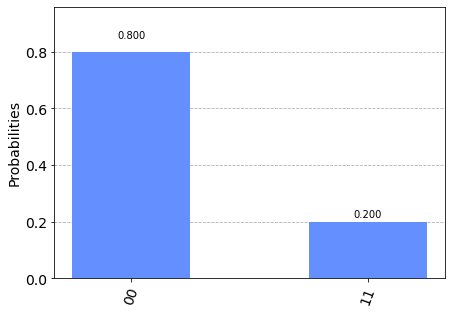

In [19]:
obj.shots = 10
counts = obj.get_circuit_outputs(points_costs_gd_optimizer[1])
plot_histogram(counts)

#### Shots 100

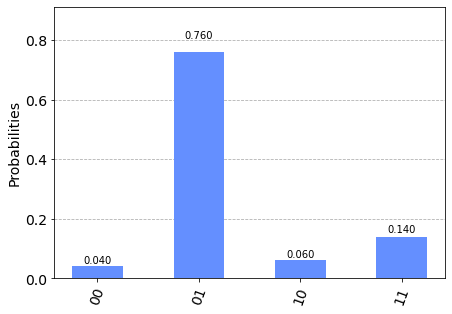

In [20]:
obj.shots = 100
counts = obj.get_circuit_outputs(points_costs_gd_optimizer[2])
plot_histogram(counts)

#### Shots 1000

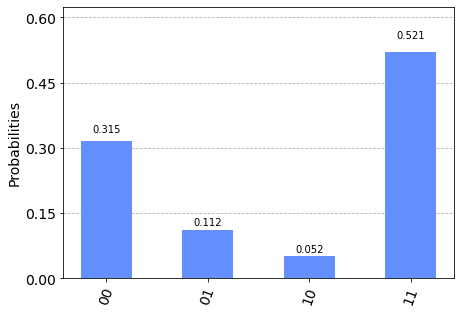

In [21]:
obj.shots = 1000
counts = obj.get_circuit_outputs(points_costs_gd_optimizer[3])
plot_histogram(counts)

### Using Gradient Descent (Noisy)

In [22]:
opt = AQGD(maxiter=500, eta=0.001, tol=0.01, disp=False, momentum=0.0)
steps = 10

points_costs_gd_optimizer = []
obj = Circuit_Class()

for shots in [1, 10, 100, 1000]:
    obj.shots = shots
    print('Running for shots: ', shots)
    temporary_points = []
    initial_point = np.random.rand(3)
    
    for i in range(steps):
        params = opt.optimize(num_vars=3, objective_function=obj.get_cost_with_noise, initial_point=initial_point)
        temporary_points.append(params)
        print(params)
        initial_point = list(params[0])
        if params[1] <= 1.00:
            break
    
    mini_cost = 500000.00
    mini_point = None
    
    for points in temporary_points:
        if points[1] < mini_cost:
            mini_point = list(points[0])
            mini_cost = points[1]
            
    points_costs_gd_optimizer.append(mini_point)

Running for shots:  1
(array([0.03526751, 0.57805175, 5.59198664]), 15000.0, 2)
(array([0.03526751, 0.57805175, 5.59198664]), 15000.0, 0)
(array([0.03526751, 0.57805175, 5.59198664]), 15000.0, 0)
(array([0.03526751, 0.57805175, 5.59198664]), 15000.0, 0)
(array([-4.96473249,  0.57805175,  5.59198664]), 5000.0, 3)
(array([-9.96473249,  0.57805175,  0.59198664]), 5000.0, 5)
(array([-9.96473249,  0.57805175,  0.59198664]), 15000.0, 0)
(array([-9.96473249,  0.57805175,  0.59198664]), 15000.0, 0)
(array([-9.96473249,  0.57805175,  0.59198664]), 15000.0, 0)
(array([-9.96473249,  0.57805175,  0.59198664]), 15000.0, 0)
Running for shots:  10
(array([-10.07043522,  -3.03901556, -31.87927594]), 0.0, 76)
Running for shots:  100
(array([ 1.58393365, -4.92534861, 66.63801081]), 2.0, 500)
(array([ 15.29093365,  -6.78734861, 113.28601081]), 0.0, 500)
Running for shots:  1000
(array([-1.39153377e-01,  2.77089157e-01, -1.91118439e+02]), 38.33999999999996, 500)
(array([ 3.95662339e-03, -6.02030843e-01, -

In [23]:
points_costs_gd_optimizer

[[-4.96473249430898, 0.5780517487402395, 5.591986642081498],
 [-10.070435217066223, -3.0390155613501797, -31.879275943346148],
 [15.290933653989079, -6.787348613095423, 113.28601080741696],
 [-6.933773376605569, -8.085990842595384, -300.3319587816134]]

### Show Results for Gradient Descent (Noiseless)

#### Shot 1

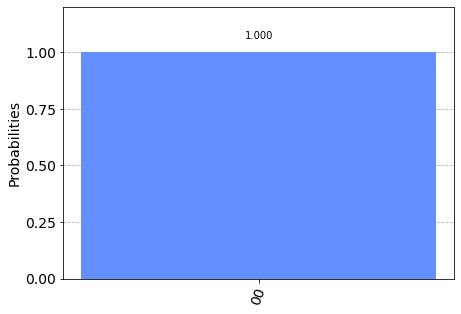

In [24]:
obj = Circuit_Class()
obj.shots = 1
counts = obj.get_circuit_outputs_with_noise(points_costs_gd_optimizer[0])

plot_histogram(counts)

#### Shots 10

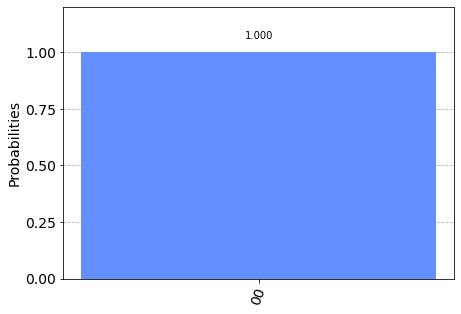

In [25]:
obj.shots = 10
counts = obj.get_circuit_outputs_with_noise(points_costs_gd_optimizer[1])
plot_histogram(counts)

#### Shots 100

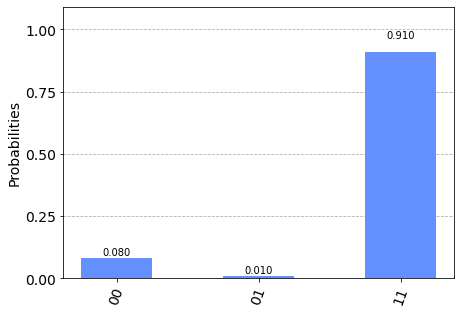

In [26]:
obj.shots = 100
counts = obj.get_circuit_outputs_with_noise(points_costs_gd_optimizer[2])
plot_histogram(counts)

#### Shots 1000

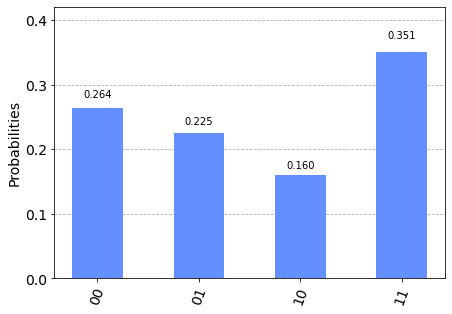

In [27]:
obj.shots = 1000
counts = obj.get_circuit_outputs_with_noise(points_costs_gd_optimizer[3])
plot_histogram(counts)

<i> Therefore we can see that, `ADAM Optimizer` performs better than `AQGD` in this particular case. </i>

### Bonus Question 

This notebook implements bell-state output using **Rx**, **Ry** and **CNOT** gate which is equivalent to the circuit using **Hadamard** gate, **CX** gate and **CNOT** gate. We all know that, Hadamard gate rotates $\lvert0\rangle$ state to $\lvert+\rangle$ state and $\lvert1\rangle$ to $\lvert-\rangle$ state. Also, Pauli $X$ (that is **CX**) gate flips  $\lvert0\rangle$ to $\lvert1\rangle$ and vice versa.

- Initially qubit $0$ and qubit $1$ are in $\lvert0\rangle$ state. 
- **CX** gate flips $\lvert0\rangle$ to $\lvert1\rangle$. And applying **Hadamard** gate creates possibility of $0.5$ $\lvert0\rangle$ state and $0.5$ $\lvert1\rangle$ state. 
- When the first qubit represents $\lvert0\rangle$ state, applying $CX$ gate does not change the state of second qubit. It becomes $\lvert01\rangle$. 
- When the first qubit is in $\lvert1\rangle$ state, the second qubit becomes $\lvert0\rangle$ after applying $CX$ gate. 
- Now, as the **Hadamard** gate rotates $\lvert0\rangle$ to $\lvert+\rangle$ state, the resulting state from the circuit becomes $\lvert01\rangle+\lvert10\rangle$.

Thus, we can see this circuit produces only $\lvert01\rangle+\lvert10\rangle$ state, not any other combination of $\lvert01\rangle$ + $e(i*\phi)\lvert10\rangle$.